In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
def show_image(image, is_gray=True):
    plt.figure(figsize=(10, 10))
    if (is_gray):
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])
    plt.show()

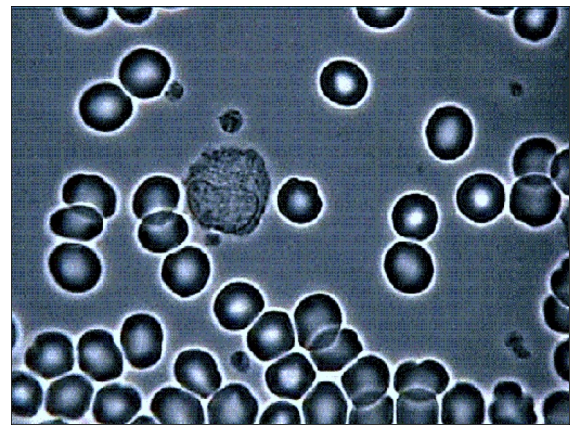

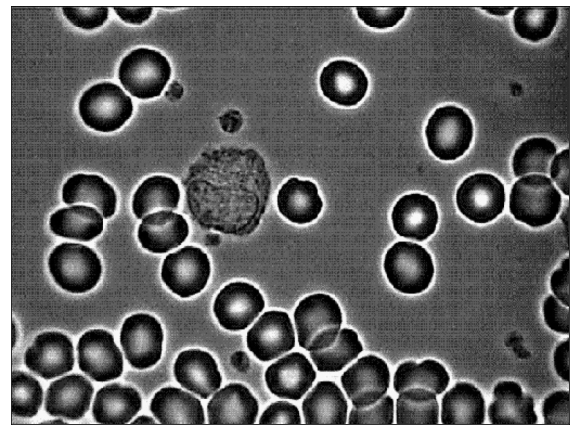

In [3]:
img = cv2.imread('img/blood.jpg')
show_image(img, False)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
show_image(gray)

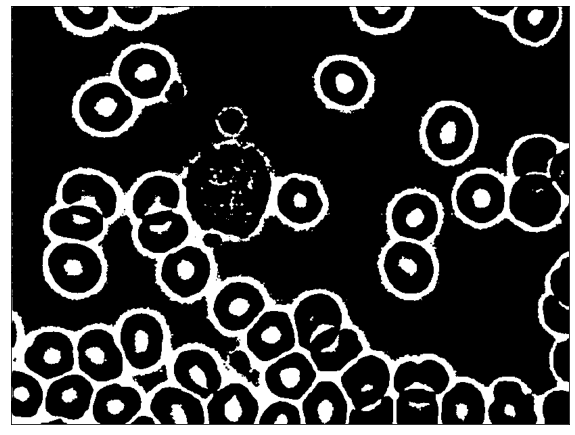

In [4]:
blur = cv2.GaussianBlur(gray,(5,5),0)
ret, thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
show_image(thresh)

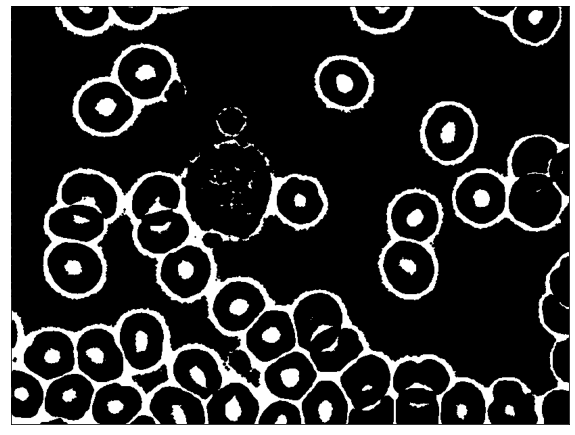

In [5]:
erode = cv2.erode(thresh,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)),iterations = 1)
show_image(erode)

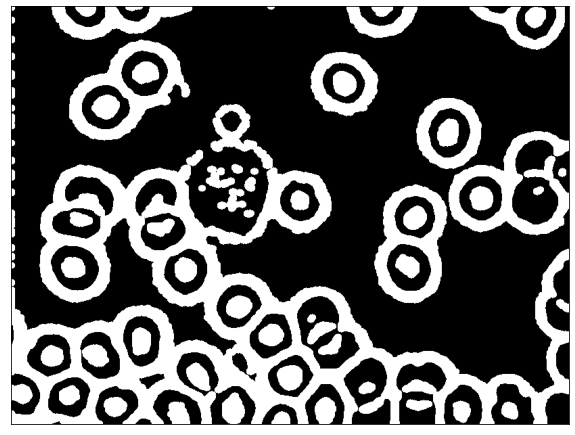

In [6]:
dilate = cv2.dilate(erode,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)),iterations = 1)
show_image(dilate)

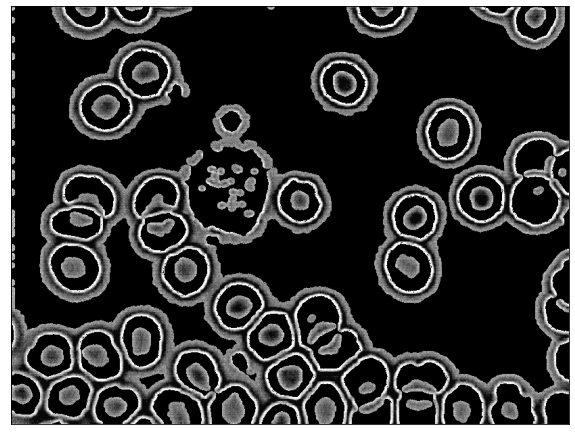

In [7]:
res = gray * dilate
show_image(res)


Найдено эритроцитов:  39


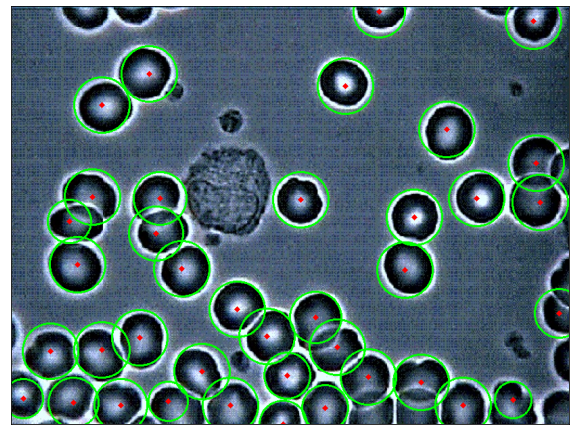

In [8]:
circles = cv2.HoughCircles(res,cv2.HOUGH_GRADIENT,1,50,
                            param1=150,param2=25,minRadius=21,maxRadius=42)
cimg = img.copy()
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
print('\nНайдено эритроцитов: ', circles[0].shape[0])
show_image(cimg, False)